# Text mining and text summarization project  from 1980 - 2019


In [66]:
!python --version

Python 3.6.7 :: Anaconda custom (64-bit)


In [67]:
# all imports
import numpy as np
import pandas as pd
import matplotlib.pyplot
import re
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
import warnings
warnings.simplefilter("ignore", DeprecationWarning)

In [68]:
# Load data
# We'll use read_csv from pandas and the file entries separated by spaces
author_info = pd.read_csv("Kenyapapers.csv", sep="\t", dtype=
                          {'title': np.str})

In [69]:
# see the types of each column
author_info.dtypes

title         object
year         float64
journal       object
lastname      object
firstname     object
address       object
email         object
pmid           int64
month        float64
day          float64
dtype: object

In [70]:
# preview the data
# see the first columns of the data with .head(), last columns with .tail and the dimensionality of the dataset with .shape
df_head = author_info.head()
df_tail = author_info.tail()
df_title = author_info.title.head(6).transpose()
df_dimensions = author_info.shape

print("Load data using pandas these are the first 5 observations: \n \n {} \n\n Here are the last five observations: {} \n\n See some of the entries in the title column {} \n\nLastly here are the number of rows and columns: {}".format(df_head, df_tail, df_title, df_dimensions))

Load data using pandas these are the first 5 observations: 
 
                                                title    year  \
0  Current Trends of Nanobiosensors for Point-of-...  2019.0   
1  Current Trends of Nanobiosensors for Point-of-...  2019.0   
2  Efficacy of Ivermectin, Liquid Paraffin, and C...  2019.0   
3  Efficacy of Ivermectin, Liquid Paraffin, and C...  2019.0   
4  Efficacy of Ivermectin, Liquid Paraffin, and C...  2019.0   

                                      journal  lastname  firstname  \
0  Journal of analytical methods in chemistry      Noah   Naumih M   
1  Journal of analytical methods in chemistry  Ndangili    Peter M   
2                Journal of tropical medicine    Ogolla  Kennedy O   
3                Journal of tropical medicine    Chebet      Joyce   
4                Journal of tropical medicine   Waruiru   Robert M   

                                             address email      pmid  month  \
0  School of Pharmacy and Health Sciences, United...

The column on title has spacing, capitalization adn some repetition because of the way the data was collected. Let's deal with that problem using the `drop_duplicates` from pandas.

In [71]:
# remove duplicate rows on the title column and keep only the first instance
df_title_full = author_info.drop_duplicates("title", keep="first")

In [72]:
# see the pandas dataframe on the default display capabilities
df_title_full

,title,year,journal,lastname,firstname,address,email,pmid,month,day
0,Current Trends of Nanobiosensors for Point-of-...,2019.0,Journal of analytical methods in chemistry,Noah,Naumih M,"School of Pharmacy and Health Sciences, United...",NaN,31886019,1.0,1.0
2,"Efficacy of Ivermectin, Liquid Paraffin, and C...",2019.0,Journal of tropical medicine,Ogolla,Kennedy O,"Department of Veterinary Pathology, Microbiolo...",NaN,31885634,1.0,1.0
8,UHC2030's Contributions to Global Health Gover...,2019.0,Health and human rights,Maleche,Allan,Executive Director of the Kenya Legal & Ethica...,NaN,31885453,12.0,1.0
9,Implementation research for public sector ment...,2019.0,BMC psychiatry,Levy,Rachel,"Medical School, University of California, San ...",NaN,31883526,12.0,28.0
26,ABC transporter genes ABC-C6 and ABC-G33 alter...,2019.0,Scientific reports,Cheseto,Xavier,The International Center of Insect Physiology ...,NaN,31882903,12.0,27.0
...,...,...,...,...,...,...,...,...,...,...
74180,Nutrient relationships in shallow water in an ...,1981.0,Oecologia,Gaudet,John J,"Department of Botany, University of Nairobi, P...",NaN,28309458,1.0,1.0
74182,'FOLIE A DEUX': (A Case Report from Kenya).,1981.0,Indian journal of psychiatry,Dhadphale,M,"Department of Psychiatry, University of Nairob...",NaN,22065665,1.0,1.0
74183,The bovine lymphoid system: II. Derivation and...,1980.0,Veterinary immunology and immunopathology,Pinder,M,International Laboratory for Research on Anima...,NaN,15615049,12.0,1.0
74186,Distribution of biomass of species differing i...,1980.0,Oecologia,Boutton,Thomas W,"Department of Botany and Range Science, Brigha...",NaN,28309553,1.0,1.0


That's abit better. Let's proceed in cleaning up the title column for analysis.

In [73]:
# turn the titles into lowercase
df_title_full["title"] = df_title_full["title"].str.lower()

/Users/aoi-rain/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [74]:
# remove punctuation on words followed by whitespaces
df_title_full['title_processed'] = df_title_full['title'].str.replace('[^\w\s]', '')

/Users/aoi-rain/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [75]:
# I think this is fine
df_title_full

,title,year,journal,lastname,firstname,address,email,pmid,month,day,title_processed
0,current trends of nanobiosensors for point-of-...,2019.0,Journal of analytical methods in chemistry,Noah,Naumih M,"School of Pharmacy and Health Sciences, United...",NaN,31886019,1.0,1.0,current trends of nanobiosensors for pointofca...
2,"efficacy of ivermectin, liquid paraffin, and c...",2019.0,Journal of tropical medicine,Ogolla,Kennedy O,"Department of Veterinary Pathology, Microbiolo...",NaN,31885634,1.0,1.0,efficacy of ivermectin liquid paraffin and car...
8,uhc2030's contributions to global health gover...,2019.0,Health and human rights,Maleche,Allan,Executive Director of the Kenya Legal & Ethica...,NaN,31885453,12.0,1.0,uhc2030s contributions to global health govern...
9,implementation research for public sector ment...,2019.0,BMC psychiatry,Levy,Rachel,"Medical School, University of California, San ...",NaN,31883526,12.0,28.0,implementation research for public sector ment...
26,abc transporter genes abc-c6 and abc-g33 alter...,2019.0,Scientific reports,Cheseto,Xavier,The International Center of Insect Physiology ...,NaN,31882903,12.0,27.0,abc transporter genes abcc6 and abcg33 alter p...
...,...,...,...,...,...,...,...,...,...,...,...
74180,nutrient relationships in shallow water in an ...,1981.0,Oecologia,Gaudet,John J,"Department of Botany, University of Nairobi, P...",NaN,28309458,1.0,1.0,nutrient relationships in shallow water in an ...
74182,'folie a deux': (a case report from kenya).,1981.0,Indian journal of psychiatry,Dhadphale,M,"Department of Psychiatry, University of Nairob...",NaN,22065665,1.0,1.0,folie a deux a case report from kenya
74183,the bovine lymphoid system: ii. derivation and...,1980.0,Veterinary immunology and immunopathology,Pinder,M,International Laboratory for Research on Anima...,NaN,15615049,12.0,1.0,the bovine lymphoid system ii derivation and p...
74186,distribution of biomass of species differing i...,1980.0,Oecologia,Boutton,Thomas W,"Department of Botany and Range Science, Brigha...",NaN,28309553,1.0,1.0,distribution of biomass of species differing i...


In [76]:
df_title_full

,title,year,journal,lastname,firstname,address,email,pmid,month,day,title_processed
0,current trends of nanobiosensors for point-of-...,2019.0,Journal of analytical methods in chemistry,Noah,Naumih M,"School of Pharmacy and Health Sciences, United...",NaN,31886019,1.0,1.0,current trends of nanobiosensors for pointofca...
2,"efficacy of ivermectin, liquid paraffin, and c...",2019.0,Journal of tropical medicine,Ogolla,Kennedy O,"Department of Veterinary Pathology, Microbiolo...",NaN,31885634,1.0,1.0,efficacy of ivermectin liquid paraffin and car...
8,uhc2030's contributions to global health gover...,2019.0,Health and human rights,Maleche,Allan,Executive Director of the Kenya Legal & Ethica...,NaN,31885453,12.0,1.0,uhc2030s contributions to global health govern...
9,implementation research for public sector ment...,2019.0,BMC psychiatry,Levy,Rachel,"Medical School, University of California, San ...",NaN,31883526,12.0,28.0,implementation research for public sector ment...
26,abc transporter genes abc-c6 and abc-g33 alter...,2019.0,Scientific reports,Cheseto,Xavier,The International Center of Insect Physiology ...,NaN,31882903,12.0,27.0,abc transporter genes abcc6 and abcg33 alter p...
...,...,...,...,...,...,...,...,...,...,...,...
74180,nutrient relationships in shallow water in an ...,1981.0,Oecologia,Gaudet,John J,"Department of Botany, University of Nairobi, P...",NaN,28309458,1.0,1.0,nutrient relationships in shallow water in an ...
74182,'folie a deux': (a case report from kenya).,1981.0,Indian journal of psychiatry,Dhadphale,M,"Department of Psychiatry, University of Nairob...",NaN,22065665,1.0,1.0,folie a deux a case report from kenya
74183,the bovine lymphoid system: ii. derivation and...,1980.0,Veterinary immunology and immunopathology,Pinder,M,International Laboratory for Research on Anima...,NaN,15615049,12.0,1.0,the bovine lymphoid system ii derivation and p...
74186,distribution of biomass of species differing i...,1980.0,Oecologia,Boutton,Thomas W,"Department of Botany and Range Science, Brigha...",NaN,28309553,1.0,1.0,distribution of biomass of species differing i...


In [77]:
# turn the pandas series object to a list
list_words = list(df_title_full["title_processed"])

In [78]:
# remove item that was signified as a float
# try uncommenting this and see what comes up
remove_itme = list_words.pop(3146)

In [79]:
# convert the full text into a list
# Join the different processed titles together.
joined_words = ' '.join(list_words)

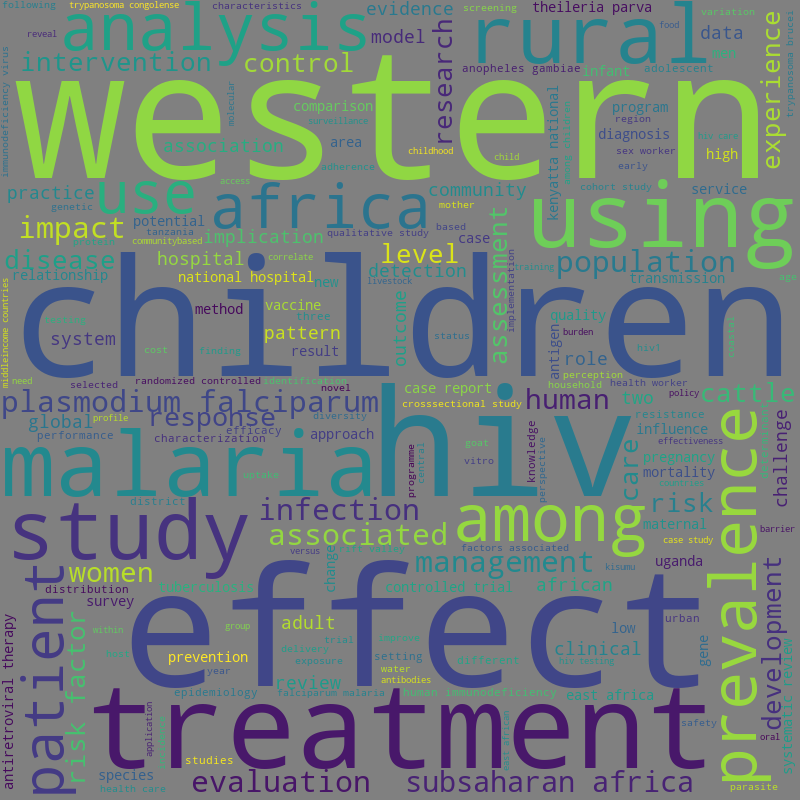

In [80]:
# word cloud of the titles of the text
# add the stopwords
stopwords = set(STOPWORDS)
stopwords.add("kenya") # common word already
stopwords.add("nairobi") # common word already
stopwords.add("kenyan")

# Create a WordCloud object and remove the specified stopwords
wordcloud = WordCloud(stopwords=stopwords, width=800, height=800, background_color="grey",random_state=2355)

# Generate a word cloud
wordcloud.generate(joined_words)

# Visualize the word cloud
wordcloud.to_image()

<IPython.core.display.Javascript object>


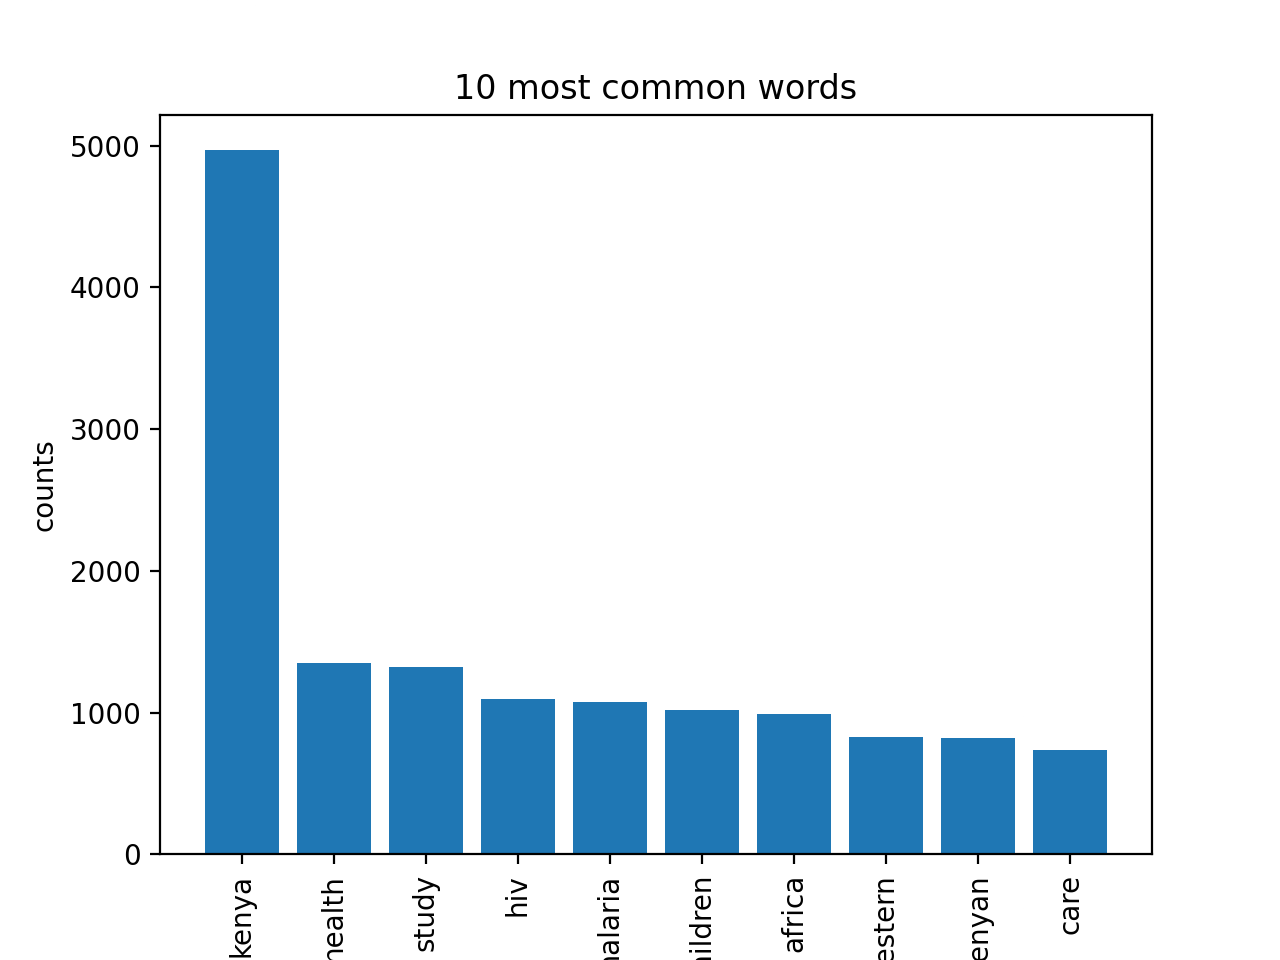

In [81]:
# Let's view this in a bar plot
%matplotlib notebook
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(list_words)

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

Fascinatingly, we see words such as HIV, Malaria coming up in our corpus a couple of times. These are studied a lot in Kenya as well as the words associated with research such as effect, analysis and study. The other interesting thing is the word western when we use the following bash command `grep --color=always "Western" Kenyapapers.csv` on the Kenyanpapers.csv we discover that they are a couple of research papers that are coming from Western Kenya as a sample. Lastly, another thing that is, worrying is the word children in the corpus. While looking at the title of the publications we see they are couple of studies that involve children some to do with Malaria, HIV and diarrheal diseases. If you visit CDC Kenya you'll find out that these are the top diseases affecting Kenya as well.

In [82]:
# Latent dirichlet analysis: Part I 
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below. I choose number of words = 3 since in english 
number_topics = 5
number_words = 3

# Create and fit the LDA model
lda = LDA(n_components=number_topics, random_state=2345)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
kenya hiv study

Topic #1:
kenya malaria african

Topic #2:
kenya children trypanosoma

Topic #3:
malaria falciparum plasmodium

Topic #4:
kenya africa health


In [83]:
# Latent dirichlet analysis: Part II
# Latent dirichlet analysis: Part I 
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below. I choose number of words = 3 since in english 
number_topics = 15
number_words = 10

# Create and fit the LDA model and adjust the perplexity
lda = LDA(n_components=number_topics, random_state=2345)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
kenya hiv women study prevalence western cancer factors rural male

Topic #1:
vaccine kenyan population african africa fever genetic transmission gene virus

Topic #2:
trypanosoma cattle resistance brucei infection infected glossina theileria congolense parva

Topic #3:
falciparum plasmodium malaria children severe baboons selection resistance antimalarial blood

Topic #4:
africa countries research subsaharan health care review global east developing

Topic #5:
case report kenya cell cases review literature evaluation child implications

Topic #6:
kenya health hospital nairobi care national study rural patients community

Topic #7:
kenya plants water district lake used bovine medicinal kenyan activities

Topic #8:
african status stress resistance using genetic results study kenya growth

Topic #9:
hiv trial study kenya randomized controlled women treatment clinical care

Topic #10:
kenya virus children human immunodeficiency disease fever valley dairy t

Let's interpret what we found. We didn't alter the parameters of the model much such as perplexity. We only altered the number of topics and the words. I haven't found a good way to tune this model yet but it's interesting what we have found so far. We found out that the direction of research for some publications is based on malaria and human immunodeficiency virus. In addition, looking at the effect of something for instance an intervention or therapy for example Uptake and effectiveness of monovalent influenza A (H1N1) pandemic 2009 vaccine among healthcare personnel in Kenya, 2010, The effect of electronic medical record-based clinical decision support on HIV care in resource-constrained settings: a systematic review and looking at treatment to some extent Chloroquine treatment of falciparum malaria in an area of Kenya of intermediate chloroquine resistance and Community-directed treatment of lymphatic filariasis in Kenya and its role in the national programmes for elimination of lymphatic filariasis. Take this with a grain of salt but we saw a lot of research originating from Western Kenya and children being sampled the most in the studies.

Does that mean if you come up with ideas in this areas HIV and malaria that you're publication will be considered. I don't know. But we can see that according to what is in the CDC Kenya website. Some of the most common things being studied are causing high mortality rates and maybe if we come up with preventative and curative approaches we may increase the life expectancy in Kenya and also improving the cost of living among other factors may lead to change.

In [85]:
!pip freeze > requirements.txt

In [ ]:
# Use this bash command to see if the publications that match a certain criteria
!cut -f 1 Kenyapapers.csv | grep --color=always "Western"

In [ ]:
# take the first column use the function grep to look for the word treatment in Kenyapapers.csv and take the first 30 rows
!cut -f 1 Kenyapapers.csv | grep --color=always "treatment" | head -n 30